In [18]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np 

### Part 1 - Gathering Data
- Create some data for our model
- Use numpy linspace to generate some points
- Plot the points on the graph

In [19]:
#Create numpy datapoints (labels) using linspace(min, max, # of datapoints) 
x = np.linspace(0,4,100) #inputs 

m = 2 
b = 0.5
#y follows the y=mx+b formula 
#y = m * x + b --> returns a linear map 

#we want to generate noise to make the data more realistic. 
y = m * x + b + np.random.randn(*x.shape) + 0.25 #x.shape picks random number between (0,100)

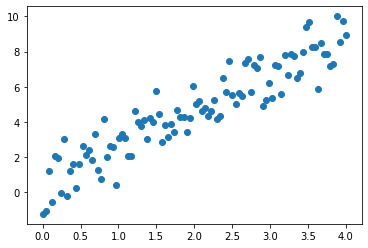

In [20]:
#Plot points on graph 
plt.scatter(x,y)

### Part 2 - Variable Nodes
- Learn about Tensorflow variable nodes
- Provide a way to store values that may change in a graph
- Can assign initial values, data types, names, etc
- We will use these to store biases and weights 

### Part 3 - Adding the Operations 
- Build an operation node for model output 
- Node will contain results of y=mx+b 
- Combine together with variable nodes to create the main part of the model 

In [21]:
#Create variables. First, create a Model class 
class Model:
    def __init__(self):     #self = the object that calls it 
        #create weight and bias variable with an arbitrary value (note: weight is "m" and bias is "b" in y=mx+b)
        self.weight = tf.Variable(10.0) #value needs to be >0 
        self.bias = tf.Variable(10.0)
        
#Take the value and replace the current value. Used to adjust weights and biases 
#self.weight.assign_sub(15.0)

    #Operation node for model output 
    def __call__(self,x):
        #combine the results of y = mx+b 
        return self.weight * x + self.bias #the mx+b formula with the variables inputted 
    
    
#model = Model()
#model(5.0) #Calls the output function with 5.0 as your self 

#Big picture: model calls the output function on itself to see if its weights and biases match up with the expected


### Part 4 - Loss Function
- Write a loss function to find the error and fix it 
- Used during training to modify weights and biases 
- Uses gradient descent 

In [22]:
#Build function that allows us to calculate loss function at any point in time 
#y_actual = expected(model's) output), y_output = current output 
def calculate_loss(y_actual, y_output):
    #return tf.square(y_actual - y_output) #need to ensure positive. 
    return tf.reduce_mean(tf.square(y_actual - y_output)) #take sqrt of average of all the points 

# Big picture: Looks at the distance between points and linear regression model by summing the distances and 
# looking at it as a single value 

### Part 5 - Training
- Build the training loop
- Train the model to adjust the weights and biases 


In [23]:
#Create training *function* (not loop) 
def train(model, x, y, learning_rate):
#learning_rate = rate at which we adjust weights and biases. Higher = more adjustments are made, changes are made
#quickly --> not fined tuned enough. Too low and values are processed too slowly 
    with tf.GradientTape() as gt: 
        #calculate loss based on the current input
        y_output = model(x)
        loss = calculate_loss(y,y_output)
        
    #minimize loss by adjusting weights and biases and suggest closer weights and biases 
    new_weight, new_bias = gt.gradient(loss, (model.weight, model.bias))
    #assign those new weights and biases by inputting them for current model. multiply by learning rates to 
    #regulate the learning speed to ensure there's no significant jump in learning 
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

### Part 6 - Training Loop 

In [24]:
#Create the training loop
model = Model()
epochs = 100 #reminder: number of times you want to run through data 
learning_rate = 0.15 
for epoch in range(epochs):
    
    #see how well the model is doing 
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    
    #run the training model 
    train(model, x, y, learning_rate)
    

Epoch: 0, loss: 727.415771484375
Epoch: 1, loss: 516.7831420898438
Epoch: 2, loss: 367.4287414550781
Epoch: 3, loss: 261.4985046386719
Epoch: 4, loss: 186.34390258789062
Epoch: 5, loss: 133.0036163330078
Epoch: 6, loss: 95.12830352783203
Epoch: 7, loss: 68.21887969970703
Epoch: 8, loss: 49.087188720703125
Epoch: 9, loss: 35.473690032958984
Epoch: 10, loss: 25.7767333984375
Epoch: 11, loss: 18.86087417602539
Epoch: 12, loss: 13.920960426330566
Epoch: 13, loss: 10.385937690734863
Epoch: 14, loss: 7.850627422332764
Epoch: 15, loss: 6.027458667755127
Epoch: 16, loss: 4.712223052978516
Epoch: 17, loss: 3.759822368621826
Epoch: 18, loss: 3.06709361076355
Epoch: 19, loss: 2.56062388420105
Epoch: 20, loss: 2.1881113052368164
Epoch: 21, loss: 1.9122525453567505
Epoch: 22, loss: 1.7063968181610107
Epoch: 23, loss: 1.5514689683914185
Epoch: 24, loss: 1.4337859153747559
Epoch: 25, loss: 1.3435046672821045
Epoch: 26, loss: 1.2735224962234497
Epoch: 27, loss: 1.218693733215332
Epoch: 28, loss: 1.175

### Part 7 - Testing and Evaluating 
- Evaluate performance of the model 
- Test with some new data 

In [27]:
#See how well model is performing
print(model.weight.numpy()) #Remember: desired weight is 2 
print(model.bias.numpy()) #Remember: desired bias is 0.5 

#Conclusion: model is doing well as the weights and biases are close to the original desired weights and biases 

2.0692506
0.54589504


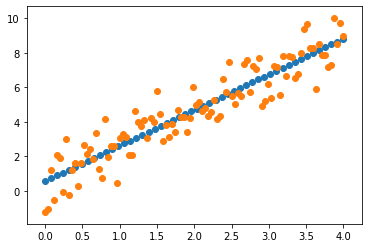

In [30]:
#Try with new data 
new_x = np.linspace(0,4,50)
new_y = model.weight.numpy() * new_x + model.bias.numpy() 
plt.scatter(new_x, new_y)
#Compare with the original dataset 
plt.scatter(x,y)

### 8 - Possible improvements
- Decrease learning rate (allows finer adjustments) and increase epochs (need both adjustments to see results)
- Restructure whole model to optimize
- Pass in more data points <br> 